In [1]:
import numpy as np

In [2]:
#定义符号函数
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
#使用numpy对其进行向量化
vec_sign = np.vectorize(sign)

In [3]:
a = [1,2,3,-1,0,0,2]
a
vec_sign(a)

array([ 1,  1,  1, -1,  0,  0,  1])

In [4]:
#LASSO 回归损失函数
def l1_loss(X, y, w, b, alpha):
    '''
    输入：
    X：输入变量矩阵
    y：输出标签变量
    w：变量参数的权重矩阵
    b：偏置
    alpha：正则化系数
    输出：
    y_hat:线性模型预测输出
    loss：均方损失值
    dw：权重系数一阶偏导
    db：偏置一阶偏导
    '''
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train + np.sum(alpha*abs(w))
    dw = np.dot(X.T, (y_hat-y)) /num_train + alpha * vec_sign(w)
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [5]:
#初始化模型参数
def initialize_params(dims):
    '''
    输入：
    dims：训练数据变量维度
    输出：
    w：初始化权重特征系数
    b：初始化偏置参数值
    '''
    w = np.zeros((dims,1))
    b = 0
    return w,b

In [32]:
#LASSO回归模型的训练过程
def LASSO_train(X,y,learning_rate = 0.01,epochs = 1000):
    '''
    输入：
    X：输入变量矩阵
    y：输出标签向量
    learning_rate：学习率
    epochs：训练迭代次数
    输出：
    loss_his:每次迭代的L1损失
    params：优化后的参数字典
    grades：优化后的参数梯度字典
    '''
    loss_his = []
    w,b = initialize_params(X.shape[1])
    for i in range(1,epochs):
        y_hat,loss,dw,db = l1_loss(X,y,w,b,0.1)
        w += -learning_rate * dw
        b += -learning_rate * db
        loss_his.append(loss)
        if i % 50 == 0:
            print('epoch %d loss %f' % (i,loss))
        params = {
            'w' : w,
            'b' : b
        }
        grades = {
            'dw' : dw,
            'db' : db
        }
    return loss,loss_his,params,grades

In [50]:
data = np.genfromtxt('example.dat',delimiter=',')
#读取文件 以‘，’分隔。 要求文件在目录之下
data

array([[-1.14558, -1.29249,  0.84911, ...,  1.5532 , -1.42135,  1.19238],
       [ 1.38724, -1.00201, -0.3337 , ...,  0.81903,  0.39286, -3.44094],
       [ 1.47233,  0.8488 , -0.33866, ...,  0.08911, -1.72476,  3.75006],
       ...,
       [-0.83673,  0.80514,  0.00807, ..., -1.64165,  2.04662,  1.84121],
       [ 1.12062,  0.68561, -1.08   , ...,  1.1926 ,  0.33696,  3.53143],
       [-0.28943, -0.22213, -0.52226, ...,  0.22531,  1.72576, -0.55118]])

In [14]:
x = data[:,0:100]
y = data[:,100].reshape(-1,1)

In [16]:
X = np.column_stack((np.ones((x.shape[0],1)),x)) #列合并
X

array([[ 1.     , -1.14558, -1.29249, ...,  0.78098,  1.5532 , -1.42135],
       [ 1.     ,  1.38724, -1.00201, ...,  0.59131,  0.81903,  0.39286],
       [ 1.     ,  1.47233,  0.8488 , ..., -0.87872,  0.08911, -1.72476],
       ...,
       [ 1.     , -0.83673,  0.80514, ...,  0.58731, -1.64165,  2.04662],
       [ 1.     ,  1.12062,  0.68561, ..., -1.70956,  1.1926 ,  0.33696],
       [ 1.     , -0.28943, -0.22213, ..., -0.67605,  0.22531,  1.72576]])

In [51]:
#划分训练集，测试集
X_train, y_train = X[:70],y[:70]
X_test, y_test = X[70:],y[70:]
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(70, 101) (70, 1) (31, 101) (31, 1)


In [52]:
#LOSS回归训练
loss,loss_list,params,grads = LASSO_train(X_train,y_train,0.01,3000)
print(params)

epoch 50 loss 3.197738
epoch 100 loss 2.297934
epoch 150 loss 1.990075
epoch 200 loss 1.832027
epoch 250 loss 1.734467
epoch 300 loss 1.673867
epoch 350 loss 1.634849
epoch 400 loss 1.608013
epoch 450 loss 1.589218
epoch 500 loss 1.574882
epoch 550 loss 1.564602
epoch 600 loss 1.555281
epoch 650 loss 1.547883
epoch 700 loss 1.541879
epoch 750 loss 1.536293
epoch 800 loss 1.531741
epoch 850 loss 1.528096
epoch 900 loss 1.524316
epoch 950 loss 1.521818
epoch 1000 loss 1.518578
epoch 1050 loss 1.516412
epoch 1100 loss 1.514460
epoch 1150 loss 1.513244
epoch 1200 loss 1.511976
epoch 1250 loss 1.511534
epoch 1300 loss 1.510989
epoch 1350 loss 1.510589
epoch 1400 loss 1.509908
epoch 1450 loss 1.509691
epoch 1500 loss 1.509368
epoch 1550 loss 1.509832
epoch 1600 loss 1.509245
epoch 1650 loss 1.509063
epoch 1700 loss 1.508948
epoch 1750 loss 1.508914
epoch 1800 loss 1.508463
epoch 1850 loss 1.508642
epoch 1900 loss 1.508507
epoch 1950 loss 1.508982
epoch 2000 loss 1.508604
epoch 2050 loss 1.50

In [53]:
# 定义预测函数
def predict(X, params):
    w = params['w']
    b = params['b']
    
    y_pred = np.dot(X, w) + b
    return y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[-0.46873492],
       [-2.8694067 ],
       [ 0.44566828],
       [-0.55241025],
       [-3.15848274]])

In [54]:
y_test[:5]

array([[ 0.24671],
       [-4.25711],
       [ 2.38642],
       [-1.87815],
       [-3.41362]])

In [55]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.5704547131357189

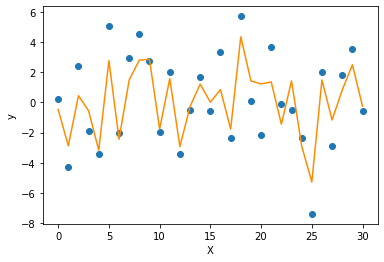

In [56]:
# 简单绘图
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show();

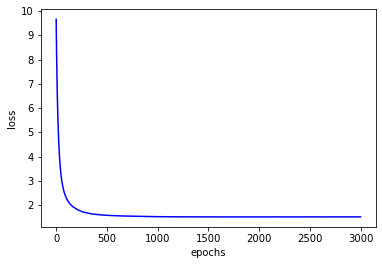

In [57]:
# 训练过程中的损失下降
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [58]:
# 导入线性模型模块
from sklearn import linear_model
# 创建lasso模型实例
sk_lasso = linear_model.Lasso(alpha=0.1)
# 对训练集进行拟合
sk_lasso.fit(X_train, y_train)
# 打印模型相关系数
print("sklearn Lasso intercept :", sk_lasso.intercept_)
print("\nsklearn Lasso coefficients :\n", sk_lasso.coef_)
print("\nsklearn Lasso number of iterations :", sk_lasso.n_iter_)

sklearn Lasso intercept : [-0.23824815]

sklearn Lasso coefficients :
 [ 0.         -0.          0.59804516  0.64230683  0.          1.0070841
 -0.          0.81815409 -0.22756851  0.          0.          0.793601
  0.          0.74108335 -0.         -0.1250168  -0.          0.79407074
  0.          0.81867433  0.          0.         -0.          0.56664364
 -0.         -0.         -0.         -0.         -0.          0.49526526
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.0078254   0.          0.         -0.
 -0.          0.01986066  0.         -0.          0.         -0.
  0.         -0.06797763  0.24581414  0.         -0.04180909 -0.
  0.10542471  0.03156005  0.          0.          0.         -0.
 -0.          0.         -0.          0.12548825  0.2340209  -0.
  0.          0.16875552  0.          0.01596168  0.         -0.
  0.          0.         -0.          0.2005080